[*********************100%***********************]  1 of 1 completed


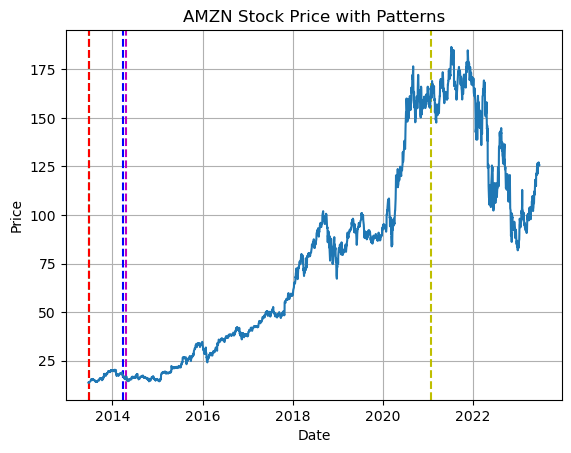

Pattern(s) detected for AMZN:
- Ascending Triangle starting from 2013-06-27 00:00:00
- Bear Flag starting from 2013-06-26 00:00:00
- Cup and Handle starting from 2014-03-28 00:00:00
- Rounding Top starting from 2014-04-22 00:00:00
- Head and Shoulders starting from 2021-01-22 00:00:00
[*********************100%***********************]  1 of 1 completed


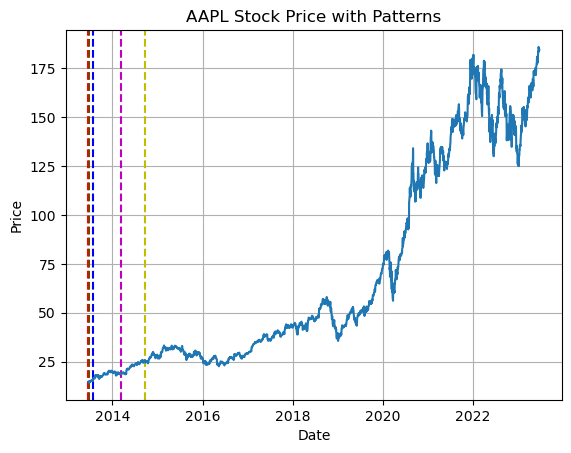

Pattern(s) detected for AAPL:
- Ascending Triangle starting from 2013-06-24 00:00:00
- Bear Flag starting from 2013-06-21 00:00:00
- Cup and Handle starting from 2013-07-30 00:00:00
- Rounding Top starting from 2014-03-11 00:00:00
- Head and Shoulders starting from 2014-09-18 00:00:00
[*********************100%***********************]  1 of 1 completed


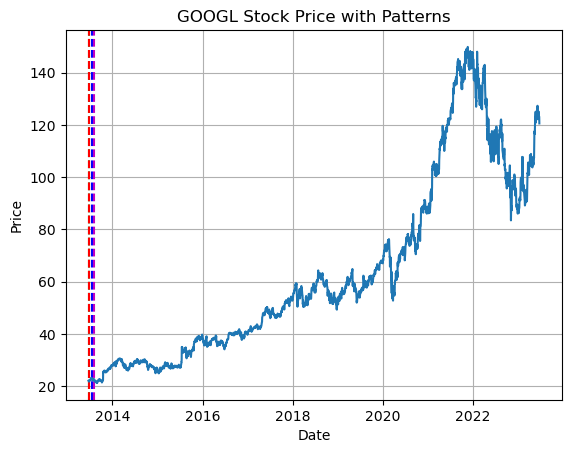

Pattern(s) detected for GOOGL:
- Ascending Triangle starting from 2013-06-25 00:00:00
- Bear Flag starting from 2013-06-24 00:00:00
- Cup and Handle starting from 2013-07-22 00:00:00
- Rounding Top starting from 2013-08-02 00:00:00
[*********************100%***********************]  1 of 1 completed


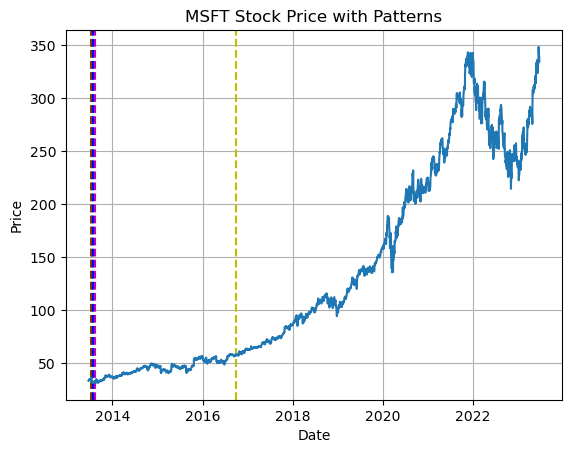

Pattern(s) detected for MSFT:
- Ascending Triangle starting from 2013-07-11 00:00:00
- Bear Flag starting from 2013-07-18 00:00:00
- Cup and Handle starting from 2013-07-25 00:00:00
- Rounding Top starting from 2013-08-12 00:00:00
- Head and Shoulders starting from 2016-09-26 00:00:00
[*********************100%***********************]  1 of 1 completed


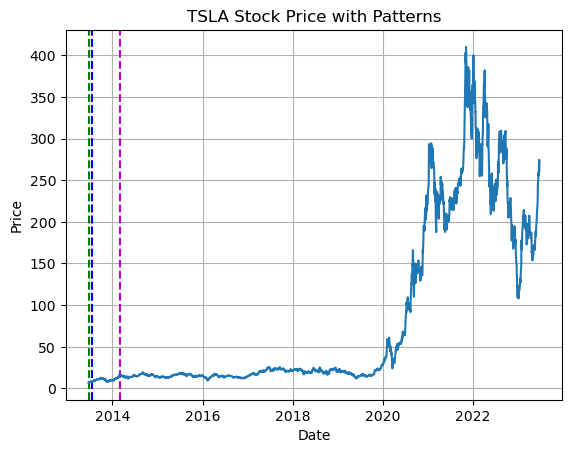

Pattern(s) detected for TSLA:
- Ascending Triangle starting from 2013-06-27 00:00:00
- Bear Flag starting from 2013-07-17 00:00:00
- Cup and Handle starting from 2013-07-17 00:00:00
- Rounding Top starting from 2014-03-04 00:00:00
[*********************100%***********************]  1 of 1 completed


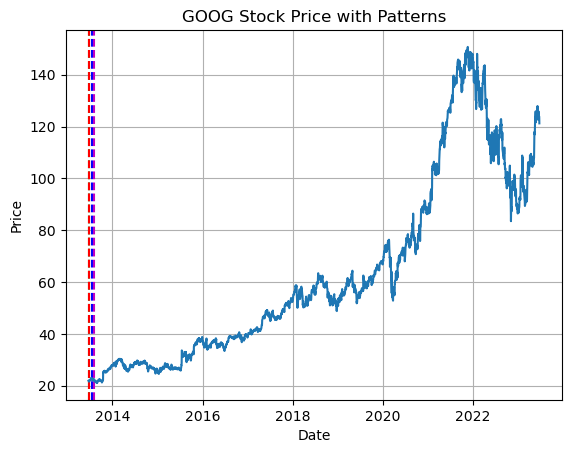

Pattern(s) detected for GOOG:
- Ascending Triangle starting from 2013-06-25 00:00:00
- Bear Flag starting from 2013-06-24 00:00:00
- Cup and Handle starting from 2013-07-22 00:00:00
- Rounding Top starting from 2013-08-02 00:00:00
[*********************100%***********************]  1 of 1 completed


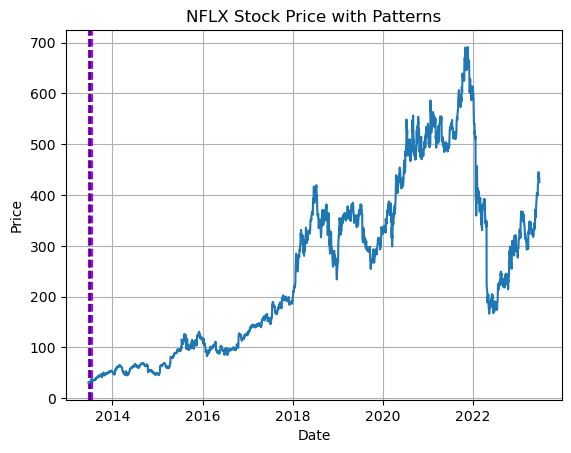

Pattern(s) detected for NFLX:
- Ascending Triangle starting from 2013-06-27 00:00:00
- Bear Flag starting from 2013-06-26 00:00:00
- Cup and Handle starting from 2013-07-01 00:00:00
- Rounding Top starting from 2013-07-18 00:00:00
[*********************100%***********************]  1 of 1 completed


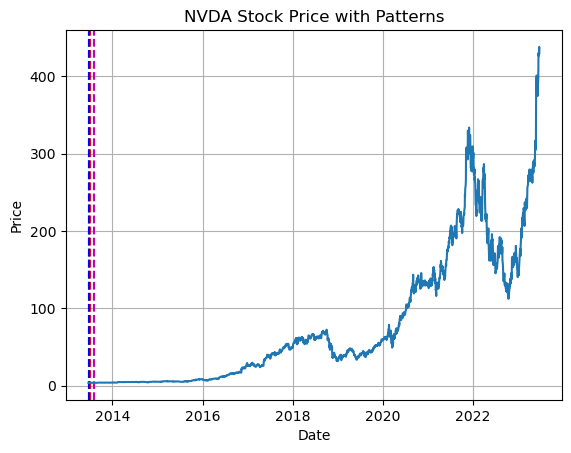

Pattern(s) detected for NVDA:
- Ascending Triangle starting from 2013-06-24 00:00:00
- Bear Flag starting from 2013-07-05 00:00:00
- Cup and Handle starting from 2013-06-27 00:00:00
- Rounding Top starting from 2013-08-06 00:00:00
[*********************100%***********************]  1 of 1 completed


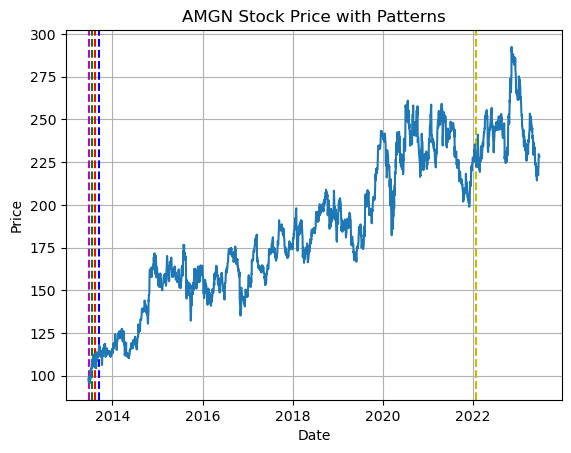

Pattern(s) detected for AMGN:
- Ascending Triangle starting from 2013-07-19 00:00:00
- Bear Flag starting from 2013-08-14 00:00:00
- Cup and Handle starting from 2013-09-18 00:00:00
- Rounding Top starting from 2013-06-27 00:00:00
- Head and Shoulders starting from 2022-01-27 00:00:00
[*********************100%***********************]  1 of 1 completed


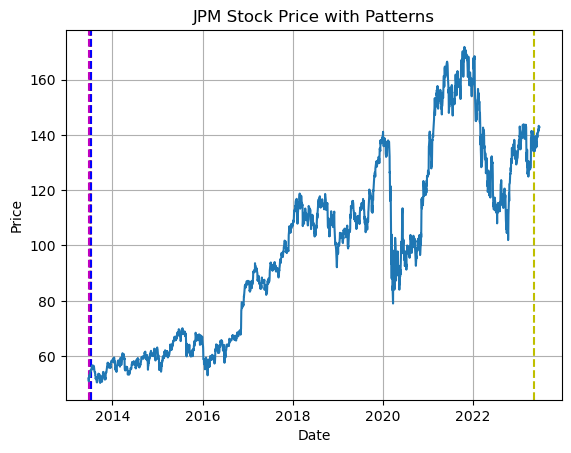

Pattern(s) detected for JPM:
- Ascending Triangle starting from 2013-07-02 00:00:00
- Bear Flag starting from 2013-07-08 00:00:00
- Cup and Handle starting from 2013-07-12 00:00:00
- Rounding Top starting from 2013-06-27 00:00:00
- Head and Shoulders starting from 2023-05-09 00:00:00


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

def check_patterns(data, stock_symbol):
    pattern_detected = False
    pattern_start_dates = []

    # Ascending triangle pattern
    ascending_triangle_start = None
    for i in range(2, len(data)):
        if data['High'][i] <= data['High'][i-1] and data['Low'][i] > data['Low'][i-1]:
            if ascending_triangle_start is None:
                ascending_triangle_start = data.index[i-1]
                pattern_detected = True
                plt.axvline(x=ascending_triangle_start, color='g', linestyle='--')
                pattern_start_dates.append(("Ascending Triangle", ascending_triangle_start))

    # Bear flag pattern
    bear_flag_start = None
    for i in range(2, len(data)):
        if data['High'][i] < data['High'][i-1] and data['Low'][i] > data['Low'][i-1] and data['Close'][i] < data['Open'][i-1]:
            if bear_flag_start is None:
                bear_flag_start = data.index[i-2]
                pattern_detected = True
                plt.axvline(x=bear_flag_start, color='r', linestyle='--')
                pattern_start_dates.append(("Bear Flag", bear_flag_start))

    # Cup and handle pattern
    cup_start = None
    for i in range(2, len(data)):
        if data['High'][i] <= data['High'][i-1] and data['Low'][i] >= data['Low'][i-1] and data['High'][i] < data['High'][i-2] and data['Low'][i] > data['Low'][i-2]:
            if cup_start is None:
                cup_start = data.index[i-2]
                pattern_detected = True
                plt.axvline(x=cup_start, color='b', linestyle='--')
                pattern_start_dates.append(("Cup and Handle", cup_start))

    # Rounding top pattern
    rounding_top_start = None
    for i in range(3, len(data)):
        if (
            data['High'][i] <= data['High'][i-1]
            and data['High'][i-1] >= data['High'][i-2]
            and data['High'][i-2] <= data['High'][i-3]
            and data['Low'][i] <= data['Low'][i-1]
            and data['Low'][i-1] <= data['Low'][i-2]
            and data['Low'][i-2] <= data['Low'][i-3]
        ):
            if rounding_top_start is None:
                rounding_top_start = data.index[i-3]
                pattern_detected = True
                plt.axvline(x=rounding_top_start, color='m', linestyle='--')
                pattern_start_dates.append(("Rounding Top", rounding_top_start))

    # Head and shoulders pattern
    head_and_shoulders_start = None
    for i in range(4, len(data)):
        if (
            data['High'][i] <= data['High'][i-1]
            and data['High'][i-1] >= data['High'][i-2]
            and data['High'][i-2] <= data['High'][i-3]
            and data['High'][i-3] >= data['High'][i-4]
            and data['Low'][i] >= data['Low'][i-1]
            and data['Low'][i-1] <= data['Low'][i-2]
            and data['Low'][i-2] >= data['Low'][i-3]
            and data['Low'][i-3] <= data['Low'][i-4]
        ):
            if head_and_shoulders_start is None:
                head_and_shoulders_start = data.index[i-4]
                pattern_detected = True
                plt.axvline(x=head_and_shoulders_start, color='y', linestyle='--')
                pattern_start_dates.append(("Head and Shoulders", head_and_shoulders_start))

    if pattern_detected:
        plt.title(f"{stock_symbol} Stock Price with Patterns")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.plot(data['Close'])
        plt.grid(True)
        plt.show()

        if pattern_start_dates:
            print(f"Pattern(s) detected for {stock_symbol}:")
            for pattern, start_date in pattern_start_dates:
                print(f"- {pattern} starting from {start_date}")
        else:
            print(f"No patterns detected for {stock_symbol}")
    else:
        print(f"No patterns detected for {stock_symbol}")

stock_symbols = ["AMZN", "AAPL", "GOOGL", "MSFT", "TSLA", "GOOG", "NFLX", "NVDA", "AMGN", "JPM"]

for symbol in stock_symbols:
    data = yf.download(symbol, period="10y", interval="1d")
    check_patterns(data, symbol)
     